In [1]:
import pandas as pd
import numpy as np
import yfinance  as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der
figsize = (12, 8) 

In [2]:
# China National Chemical Corp., Ltd. 50.9 severe risk (chemicals)
# Tokyo Energy & Systems, Inc. 45.7 severe risk (construction & engineering)
# BGC Partners, Inc. 33.6 high risk (diversified financials)
# Taiwan Semiconductor Co., Ltd. 35.6 high risk (semiconductors)
# Bangkok Airways Public Co., Ltd. 38.5 high risk (transportation)


symbols_list = ["601117.SS", "1945.T", "BGCP", "5425.TWO", "BA.BK"]
count = len(symbols_list)
symbols = []

for ticker in symbols_list:
    tick = yf.Ticker(ticker)
    history = tick.history(period='max')
    history['Symbol'] = ticker
    symbols.append(history)

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df = df.drop_duplicates()
price = df.pivot('Date','Symbol','Close').reset_index()
price['Date'] = pd.to_datetime(price['Date'], utc=True)
price['Date'] = price['Date'].dt.date
# price.index = price.Date
price = price.set_index('Date')
price.index = pd.to_datetime(price.index)
# price.drop(columns=['Date'], inplace=True)  
price.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4516\2071702657.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  price = df.pivot('Date','Symbol','Close').reset_index()


Symbol,1945.T,5425.TWO,601117.SS,BA.BK,BGCP
Date,,,,,
1999-12-10,NaN,NaN,NaN,NaN,10.363495
1999-12-13,NaN,NaN,NaN,NaN,13.444539
1999-12-14,NaN,NaN,NaN,NaN,13.444539
1999-12-15,NaN,NaN,NaN,NaN,11.454391
1999-12-16,NaN,NaN,NaN,NaN,11.262747


In [3]:
price.columns

Index(['1945.T', '5425.TWO', '601117.SS', 'BA.BK', 'BGCP'], dtype='object', name='Symbol')

# Monthly Price

In [4]:
month_price = price.resample("1m").agg("last")
month_price

Symbol,1945.T,5425.TWO,601117.SS,BA.BK,BGCP
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,8.388094
2000-01-31,NaN,NaN,NaN,NaN,16.201254
2000-02-29,NaN,NaN,NaN,NaN,14.609144
2000-03-31,NaN,NaN,NaN,NaN,12.353642
2000-04-30,NaN,NaN,NaN,NaN,11.144814
...,...,...,...,...,...
2023-01-31,900.932922,90.300003,8.84,14.6,4.331347
2023-02-28,904.910522,91.800003,9.20,12.9,4.839160
2023-03-31,892.000000,104.000000,9.28,13.5,5.217865


In [5]:
month_ret = month_price.pct_change()
month_ret.head()

Symbol,1945.T,5425.TWO,601117.SS,BA.BK,BGCP
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN
2000-01-31,NaN,NaN,NaN,NaN,0.931458
2000-02-29,NaN,NaN,NaN,NaN,-0.098271
2000-03-31,NaN,NaN,NaN,NaN,-0.154390
2000-04-30,NaN,NaN,NaN,NaN,-0.097852


In [6]:
month_ret = month_ret.iloc[-61:-1]
month_ret

Symbol,1945.T,5425.TWO,601117.SS,BA.BK,BGCP
Date,,,,,
2018-05-31,-0.029940,0.276316,0.019178,-0.026316,-0.129434
2018-06-30,-0.018519,-0.010309,-0.082420,-0.229730,-0.012216
2018-07-31,-0.056604,0.021683,0.023774,0.131579,-0.051237
2018-08-31,-0.096667,-0.135294,-0.034833,0.007752,0.174813
2018-09-30,0.037371,-0.164626,0.003007,0.030769,-0.048309
2018-10-31,-0.121185,-0.190554,-0.131934,-0.119403,-0.104061
2018-11-30,-0.014300,0.142857,-0.022453,0.033898,0.011565
2018-12-31,0.000000,-0.100352,-0.053003,-0.049180,-0.237253
2019-01-31,-0.015544,0.095890,0.022388,0.051724,0.197292


# Mean and Std

In [7]:
mean = month_ret.mean()
mean = mean * 12
mean 

Symbol
1945.T      -0.036964
5425.TWO     0.235308
601117.SS    0.163264
BA.BK        0.068106
BGCP         0.040854
dtype: float64

In [8]:
std = month_ret.std()
std = std * np.sqrt(12)
std 

Symbol
1945.T       0.193309
5425.TWO     0.541623
601117.SS    0.386682
BA.BK        0.448062
BGCP         0.495875
dtype: float64

# Distribution Chart

In [9]:
month_ret.columns 

Index(['1945.T', '5425.TWO', '601117.SS', 'BA.BK', 'BGCP'], dtype='object', name='Symbol')

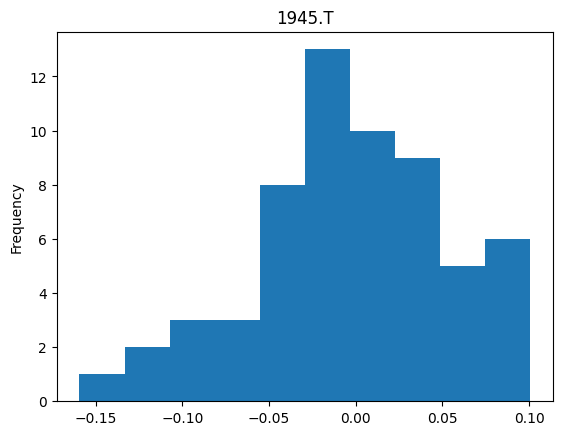

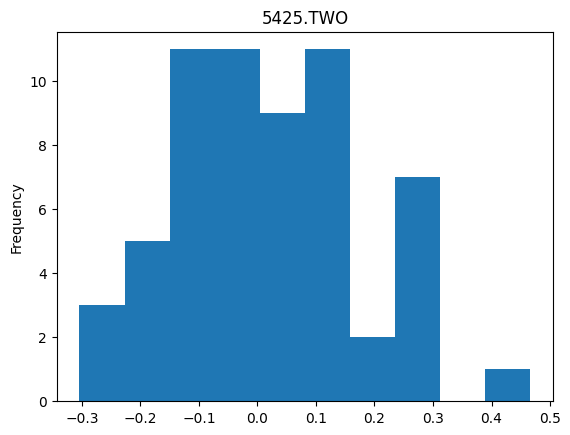

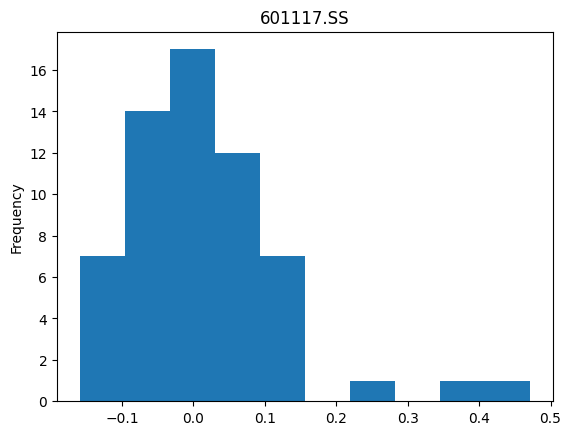

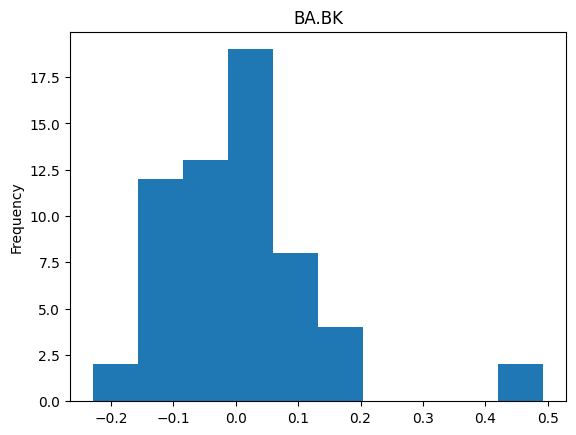

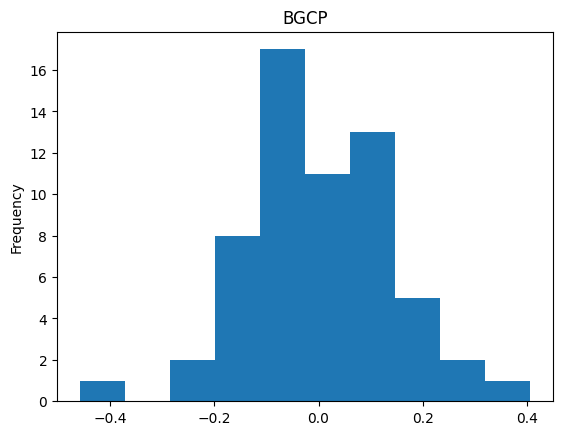

In [10]:
for symbol in month_ret.columns:
    month_ret[symbol].plot.hist()
    plt.title(symbol)
    plt.show()

# Covariance

In [11]:
cov = month_ret.cov()

cov_matrix = month_ret.apply(lambda x: np.log(1+x)).cov()
cov_matrix, cov
cov

Symbol,1945.T,5425.TWO,601117.SS,BA.BK,BGCP
Symbol,,,,,
1945.T,0.003114,0.002726,0.001633,0.000189,0.001398
5425.TWO,0.002726,0.024446,0.005351,0.006255,0.009247
601117.SS,0.001633,0.005351,0.012460,0.006429,0.004190
BA.BK,0.000189,0.006255,0.006429,0.016730,0.006066
BGCP,0.001398,0.009247,0.004190,0.006066,0.020491


# Assets

In [12]:
assets = pd.concat([mean, std], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbol,,
1945.T,-0.036964,0.193309
5425.TWO,0.235308,0.541623
601117.SS,0.163264,0.386682
BA.BK,0.068106,0.448062
BGCP,0.040854,0.495875


In [13]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(price.columns)
num_portfolios = 10000

num_assets 

5

In [14]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, mean)
    p_ret.append(returns)
    var = np.dot(weights.T, np.dot(cov, weights))
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(12)
    p_vol.append(ann_sd)

In [15]:
data = {'Returns':p_ret, 'Volatility':p_vol}
pd.DataFrame( data )

,Returns,Volatility
0,0.086320,0.245190
1,0.056928,0.250095
2,0.087549,0.265707
3,0.077300,0.255544
4,0.102045,0.288885
...,...,...
9995,0.083721,0.241078
9996,0.104135,0.340484
9997,0.093225,0.270690
9998,0.080625,0.255414


In [16]:
for counter, symbol in enumerate(price.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
print(counter)  

4


In [17]:
rf = 0.025
portfolios = pd.DataFrame(data)
portfolios['Sharpe Ratio'] = (portfolios['Returns']-rf) / portfolios['Volatility']
portfolios.head()

,Returns,Volatility,1945.T weight,5425.TWO weight,601117.SS weight,BA.BK weight,BGCP weight,Sharpe Ratio
0,0.086320,0.245190,0.328710,0.136376,0.335566,0.126583,0.072764,0.250091
1,0.056928,0.250095,0.311485,0.035932,0.239626,0.146506,0.266451,0.127662
2,0.087549,0.265707,0.254010,0.182009,0.218132,0.160278,0.185571,0.235408
3,0.077300,0.255544,0.260156,0.071088,0.301673,0.217957,0.149126,0.204662
4,0.102045,0.288885,0.223783,0.236423,0.262833,0.016818,0.260142,0.266698


<Axes: xlabel='Volatility', ylabel='Returns'>

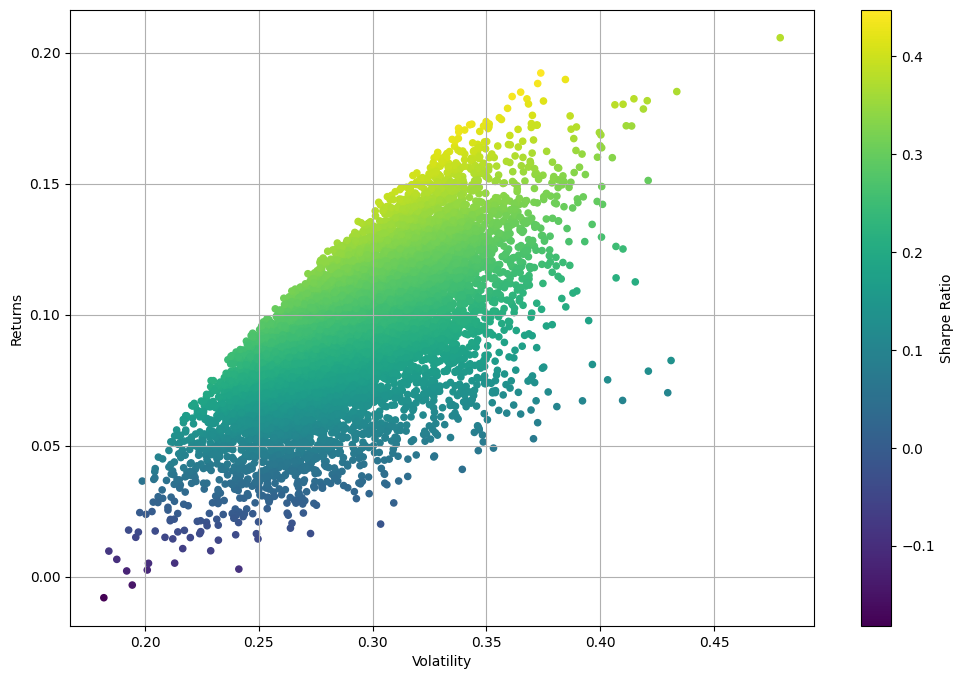

In [18]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)

# Minimun Variance

In [19]:
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,1945.T weight,5425.TWO weight,601117.SS weight,BA.BK weight,BGCP weight,Sharpe Ratio
9586,-0.008064,0.181907,0.774933,0.031361,0.003965,0.176189,0.013552,-0.181765


In [20]:
min_var_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_var_port

Returns            -0.008064
Volatility          0.181907
1945.T weight       0.774933
5425.TWO weight     0.031361
601117.SS weight    0.003965
BA.BK weight        0.176189
BGCP weight         0.013552
Sharpe Ratio       -0.181765
Name: 9586, dtype: float64

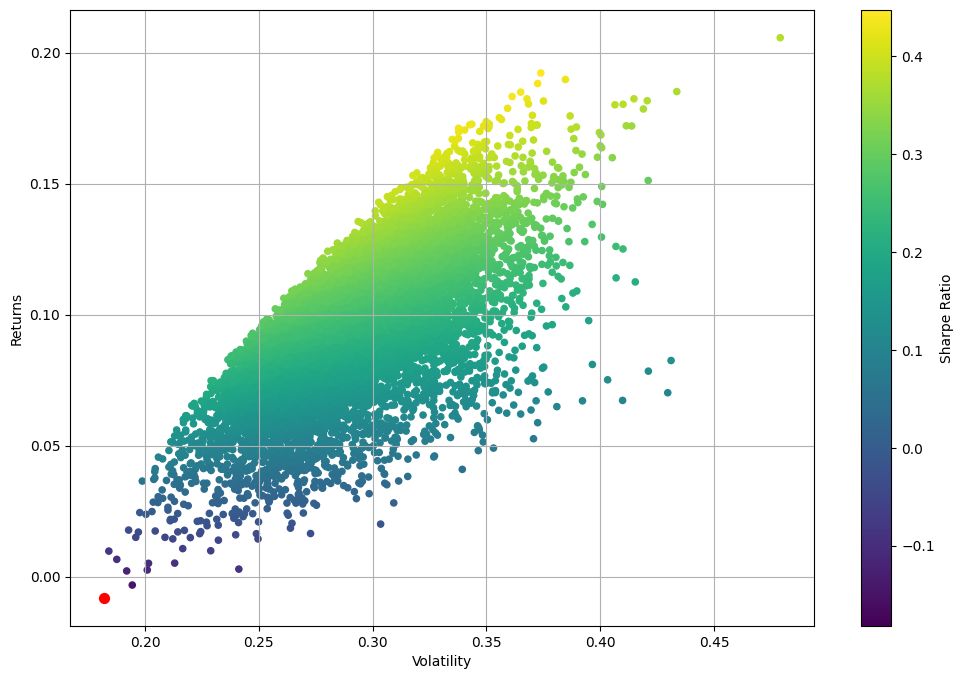

In [21]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port[1], min_var_port[0], color='r', s=50)

# Max Sharpe Ratio

$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

In [22]:
((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()

2175

In [23]:
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns             0.192249
Volatility          0.373849
1945.T weight       0.021233
5425.TWO weight     0.510560
601117.SS weight    0.437371
BA.BK weight        0.008379
BGCP weight         0.022458
Sharpe Ratio        0.447370
Name: 2175, dtype: float64

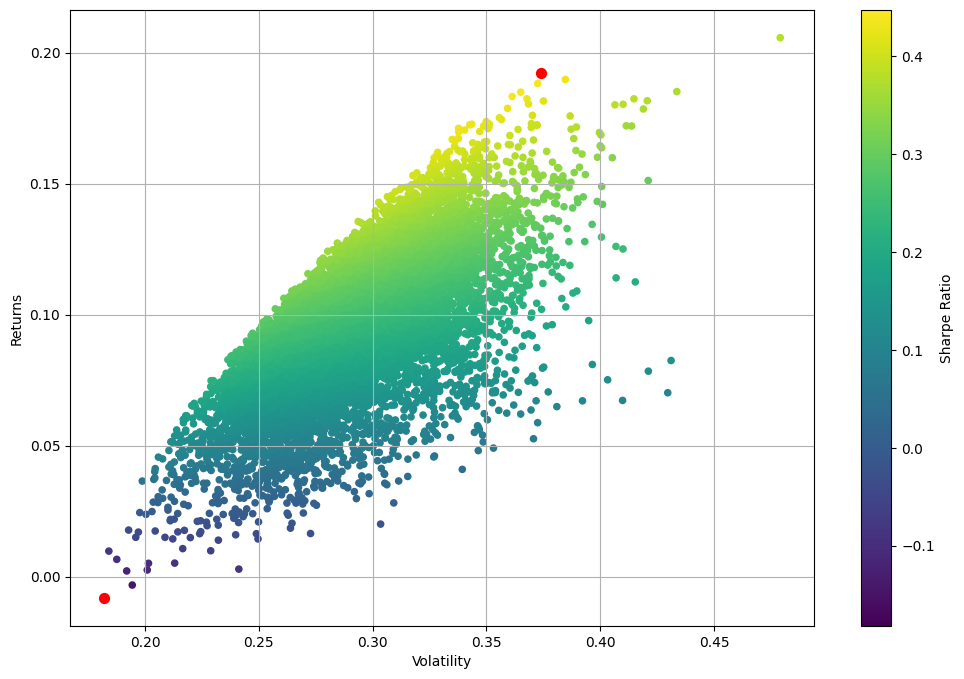

In [24]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port[1], min_var_port[0], color='r', s=50)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='r', s= 50)

# Capital Allocation Line

$$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$

In [25]:
cal_x = []
cal_y = []

In [26]:
for er in np.linspace(rf, max(p_ret), 20):
    sd = (er - rf)/((optimal_risky_port[0]-rf)/optimal_risky_port[1])
    cal_x.append(sd)
    cal_y.append(er)

In [27]:
data2 = {'cal_y':cal_y, 'cal_x':cal_x}
cal = pd.DataFrame(data2)
cal.head()

,cal_y,cal_x
0,0.025000,0.000000
1,0.034511,0.021261
2,0.044023,0.042522
3,0.053534,0.063783
4,0.063046,0.085043


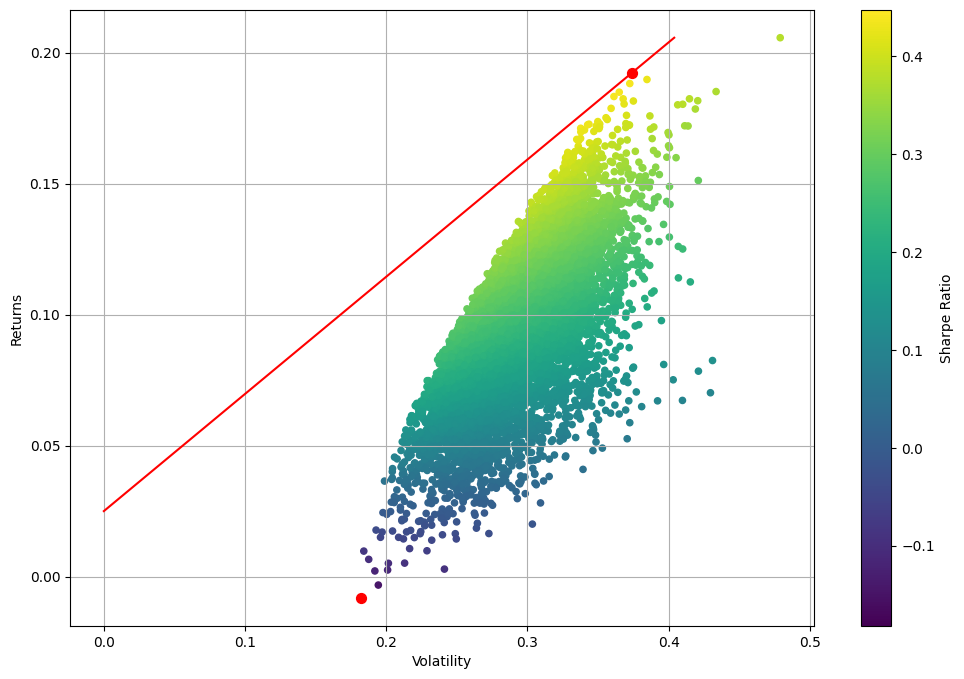

In [28]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port[1], min_var_port[0], color='r', s=50)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='r', s= 50)
plt.plot(cal_x, cal_y, color='r')

# Efficient Frontier

In [29]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(month_ret.mean() * weights) * 12
    vol = np.sqrt(np.dot(weights.T, np.dot(month_ret.cov()*12, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [30]:
frontier_y = np.linspace(0.08, 0.34, 50)
frontier_y

array([0.08      , 0.08530612, 0.09061224, 0.09591837, 0.10122449,
       0.10653061, 0.11183673, 0.11714286, 0.12244898, 0.1277551 ,
       0.13306122, 0.13836735, 0.14367347, 0.14897959, 0.15428571,
       0.15959184, 0.16489796, 0.17020408, 0.1755102 , 0.18081633,
       0.18612245, 0.19142857, 0.19673469, 0.20204082, 0.20734694,
       0.21265306, 0.21795918, 0.22326531, 0.22857143, 0.23387755,
       0.23918367, 0.2444898 , 0.24979592, 0.25510204, 0.26040816,
       0.26571429, 0.27102041, 0.27632653, 0.28163265, 0.28693878,
       0.2922449 , 0.29755102, 0.30285714, 0.30816327, 0.31346939,
       0.31877551, 0.32408163, 0.32938776, 0.33469388, 0.34      ])

In [31]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [32]:
bounds = tuple( [ (0,1) for i in range(count) ] )
init_guess = [1/count] * count 

In [33]:
bounds 

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [34]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

<Figure size 1200x800 with 0 Axes>

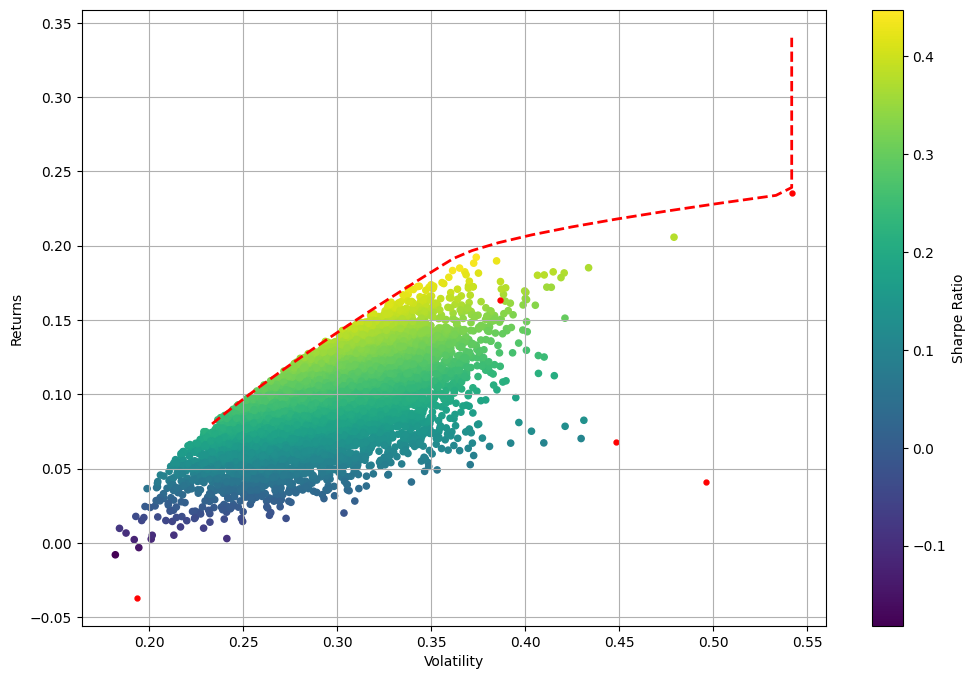

In [35]:
plt.figure(figsize=(12,8))
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.plot(frontier_x,frontier_y, 'r--', linewidth=2)

# plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
# plt.scatter(min_var_vol, min_var_ret,c='red',marker='x', s=50) # red dot
# plt.scatter(max_sr_vol2, max_sr_ret2,c='purple', s=50) # red dot
# plt.scatter(min_var_vol2, min_var_ret2,c='purple',marker='x', s=50) # red dot

plt.scatter(std, mean,c='red',marker='.', s=50) # red dot
# plt.savefig('cover.png')
plt.show()

# Utility Function

In [36]:
A= 4 
# indifference_sigma = np.linspace(0, 0.15, 100)
# indifference_return = U + 0.5 * A * np.square( indifference_sigma )


In [37]:
optimal_y = (optimal_risky_port[0] - rf) / (A*optimal_risky_port[1]**2)
optimal_y

0.2991645328643274

In [38]:
optimal_u = rf + optimal_y * (optimal_risky_port[0] - rf) - 0.5*A*optimal_y**2*optimal_risky_port[1]**2
optimal_u

0.050017480438346015